In [53]:
import scipy
import numpy
import matplotlib
import numpy as np
import os
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

from __future__ import division

In [54]:
exp1 = np.fromfile("D:\phase.dat",dtype=float,count=-1, sep=" ")

In [55]:
exp1.shape

(2410L,)

In [56]:
exp1

array([ -8.00000000e-01,   2.85928000e-09,   2.86378000e-09, ...,
         1.33335000e-09,   1.35800000e-09,   1.42873000e-09])

In [57]:
exp1 = np.reshape(exp1, (241,10))
exp2 = exp1.transpose()

In [58]:
exp2.shape
exp3=exp2

(1e-09, 3e-09)

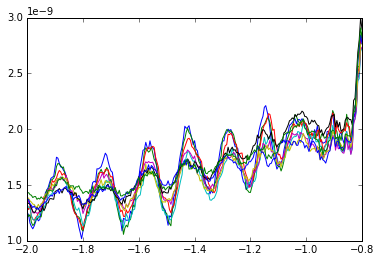

In [59]:
for i in range(1,10):
    plt.plot(exp2[0],exp2[i])
plt.savefig('D:\\sl0.pdf', format='pdf')
plt.ylim(1E-9,3E-9)

In [60]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

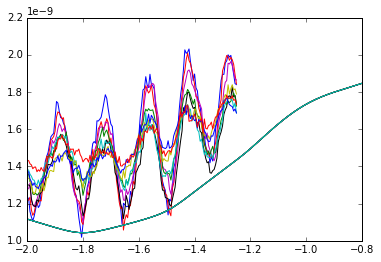

In [61]:

for i in range(1,10):
    dat=baseline_als(exp2[1],1000,0.001,10)
    plt.plot(exp2[0,90:240],exp2[i,90:240])
    plt.plot(exp2[0],dat)
for i in range(1,10):
    exp2[i]=(exp2[i]-dat)*1E9

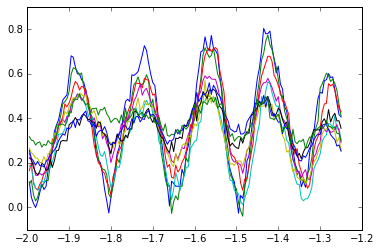

In [62]:

for i in range(1,10):
    plt.plot(exp2[0,90:240],exp2[i,90:240])

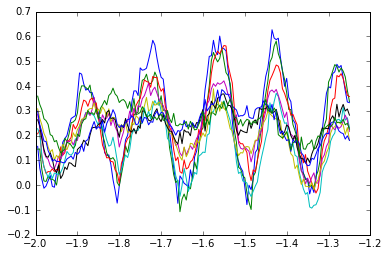

In [516]:

for i in range(1,10):
    plt.plot(exp2[0,90:240],exp2[i,90:240])
   # 
    #plt.xlim(-2,-1.25)
    #plt.ylim(0,0.8)
plt.savefig('D:\\sl1.pdf', format='pdf')


In [97]:
lam=40E-9
w0=200E-9
z0=np.pi*w0*w0/lam
R=2E-6
k=2*np.pi/lam
def width(l):
    return np.sqrt(w0*w0*(1+l*l/(z0*z0)))

def radiusin(l):
    return l+z0*z0/l
def radius(m,l):
    rr=0
    for i in range(1,m):
                rr=rr+l+z0*z0/l
                rr=rr*R/(R-2*rr)
    return rr
def theta(l):
    return np.arctan(l/z0) 

print radius(10,2E-6)

-1.21172643631e-06


In [101]:
def psi(y,l,m):
    psi=w0/width(l)*np.exp(-y*y/np.power(width(l),2))*np.exp(-1j*k*y*y/(2*radius(m,l)))*np.exp(-1j*k*l+1j*theta(l))    
    return psi
print psi(2E-6,2E-6,10)

(-6.37385126655e-32+8.36090775778e-32j)


In [102]:
import scipy.integrate as integrate
def psisum(y,l,r):
    for i in range(1,100):
        summ=summ+np.power(r,i)*psi(y,l*i)
    return summ
#def intens(l,r)
#    return quad(np.abs(psisum), 0, 1, args=(a,b))
plt.plot()

[[Fit Statistics]]
    # function evals   = 417
    # data points      = 150
    # variables        = 8
    chi-square         = 4.581
    reduced chi-square = 0.032
    Akaike info crit   = -507.300
    Bayesian info crit = -483.215
[[Variables]]
    f:   -0.20000000 +/- 0        (0.00%) (init=-0.2)
    a:    1          +/- 0        (0.00%) (init= 1)
    a2:   0.50000000 +/- 0        (0.00%) (init= 2)
    b2:   1          +/- 0        (0.00%) (init= 1)
    b:    7.54043404 +/- 0        (0.00%) (init= 10)
    c:    3.45919386 +/- 0        (0.00%) (init= 3)
    d:    3          +/- 0        (0.00%) (init= 3)
    e:    3          +/- 0        (0.00%) (init= 3)
[[Correlations]] (unreported correlations are <  0.100)


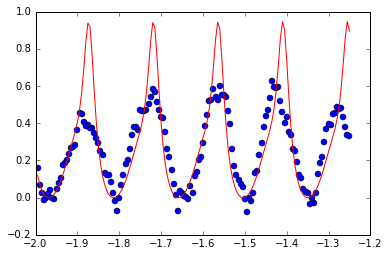

In [523]:
#!/usr/bin/env python
#<examples/doc_basic.py>
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted

for i in range(1,2):
    x=exp2[0,90:240]
    data=exp2[i,90:240]
# define objective function: returns the array to be minimized
    def fcn2min(params, x, data):
        """ model decaying sine wave, subtract data"""
        f = params['f']
        a = params['a']
        b = params['b']
        c = params['c']
        d = params['d']
        e = params['e']
        a2 = params['a2']
        b2 = params['b2']
        f1=-0.4+a/(1+(b)*np.power(np.sin(c+x*1000/49.25),2))
        f2=a2/(1+(b2)*np.power(np.sin(c+x*1000/(49.25)+0.125*4000/(49.25)),2))
        f3=0.5/(1+(2)*np.power(np.sin(c+x*1000/(49.25)-0.125*2000/(49.25)),2))
        model=f1+f2
        return model - data

# create a set of Parameters
    params = Parameters()
    params.add('f',   value= -0.2)
    params.add('a', value= 1,min=1 )
    params.add('a2', value= 2, min=0.5)
    params.add('b2', value=1, min=1)
    params.add('b', value= 10 , min=1, max=20)
    params.add('c', value= 3.0)
    params.add('d', value= 3.0, min=0.5)
    params.add('e', value= 3.0, min=1)
   

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
    
# write error report
    report_fit(result)
  
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    #plt.ylim(9,10)
    params2=result.params
    v = params2.valuesdict()
    a[1,i]=v['b']
#plt.savefig('D:\\sl2.pdf', format='pdf')

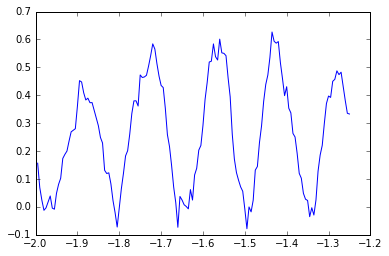

In [518]:
for i in range(1,2):
    plt.plot(exp2[0,90:240],exp2[i,90:240])
   # plt.plot(exp2[0],dat)
    #plt.xlim(-2,-1.25)
    #plt.ylim(0,0.8)
plt.savefig('D:\\sl1.pdf', format='pdf')


In [519]:
for i in range(1,10):
    a[1,i]=np.abs(np.pi/(2*np.arcsin(1/np.sqrt(a[1,i]))))


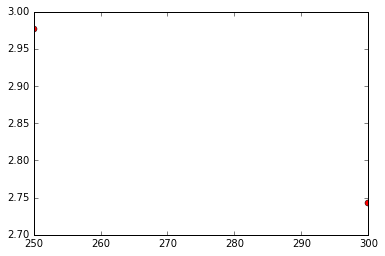

In [520]:
for i in range(1,10):
    plt.plot(a[0,i],a[1,i], 'or')
plt.savefig('D:\\slf.pdf', format='pdf')    

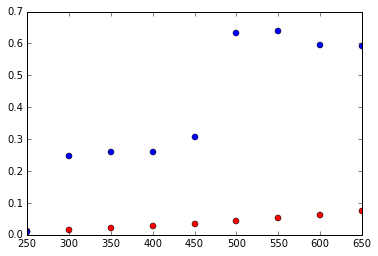

In [497]:
for i in range(1,10):
    plt.plot(a[0,i],1/np.power(2.4*1000/a[0,i],2), 'or')
for i in range(1,10):
    plt.plot(a[0,i],1/np.power(a[1,i],2), 'ob')
plt.savefig('D:\\sl4.pdf', format='pdf')    

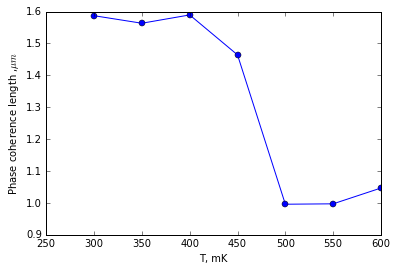

In [498]:
for i in range(1,10):
    a[1,i]=1/np.sqrt(1/np.power(a[1,i],2)-1/np.power(2.4*1000/a[0,i],2))
plt.plot(a[0,1:10],a[1,1:10]*2.4/np.pi, 'o-')
#plt.plot(a[0],a[1])
plt.xlabel("T, mK")
plt.ylabel("Phase coherence length ,$\mu m$")
plt.xlim(250,600)
#plt.ylim(1.1,1.9)
plt.savefig('D:\\sl5.pdf', format='pdf')


In [499]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi
t = scipy.linspace(0,241,241)

for i in range(1,10):
    FFT = abs(scipy.fft(exp2[i]))
    freqs = scipy.fftpack.fftfreq(exp2[i].size, t[1]-t[0])
    exp2[i]=FFT
    exp2[0]=freqs

#pylab.subplot(211)
#pylab.plot(t, signal)
#plt.xlim(-2,0.7)
#pylab.subplot(212)
#pylab.plot(freqs,np.log(FFT) )
#plt.xlim(-100,100)
#plt.ylim(-19,-24)
#plt.savefig('/home/sergey/Documents/s4', format='pdf')
#pylab.show()

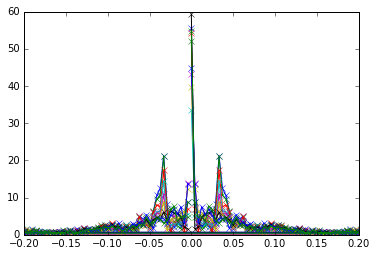

In [500]:
for i in range(1,10):
    plt.plot(exp2[0],exp2[i], 'x-')
    plt.xlim(-0.2,0.2)
  #  plt.ylim(0,0.5E-7)
plt.savefig('D:\\p3.pdf', format='pdf')

In [501]:
exp2[1]

array([ 55.58525114,   8.7219773 ,   3.2850747 ,   2.3684156 ,
         3.11471503,   2.20426626,   1.74597598,   8.15432103,
        21.31392302,  12.52344466,  10.56644849,   6.20876602,
         1.65343601,   4.13666571,   4.29964494,   5.00832052,
         1.46639687,   2.93486841,   1.8240556 ,   2.66344674,
         1.56758304,   3.18700454,   2.29032122,   2.71026117,
         2.1826103 ,   2.58321423,   1.92366857,   0.38428177,
         0.75735279,   1.42689154,   0.80897724,   1.805626  ,
         0.69390635,   1.64810431,   1.10185929,   1.01047305,
         1.15109926,   1.06393024,   0.63260861,   0.81165326,
         0.41788611,   0.4480663 ,   0.58547795,   0.76496071,
         0.98209145,   0.89752988,   1.6611044 ,   0.54572041,
         0.50145557,   1.36741159,   1.69779244,   1.26450687,
         0.41847191,   0.76144038,   0.4867135 ,   0.59958907,
         0.1629547 ,   0.4547721 ,   0.54954409,   0.48437745,
         0.47710751,   0.7466255 ,   0.63746049,   0.65

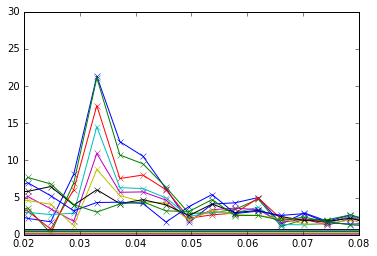

In [502]:
for i in range(1,10):
    plt.plot(exp2[0],exp2[i], '-x')
    plt.xlim(0.02,0.08)
    plt.ylim(0,30)

In [503]:
a=np.empty([2, 10])

In [504]:
for i in range(1,10):
    a[0,i]=250+50*(i-1)

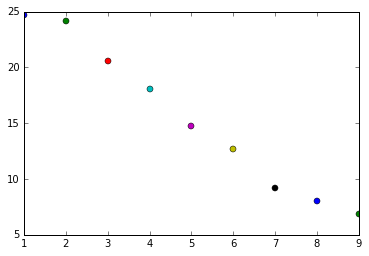

In [25]:
for i in range(1,10):
    plt.plot(i,exp2[i,8], 'o')
    a[1,i]=exp2[i,8]

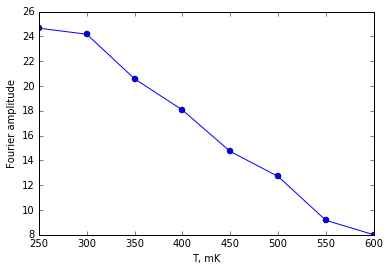

In [26]:
plt.plot(a[0,1:9],a[1,1:9], 'o-')
#plt.plot(a[0],a[1])
plt.xlabel("T, mK")
plt.ylabel("Fourier amplitude")
#plt.xlim(200,800)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0,1.2E-8)
#plt.savefig('D:\\p4.pdf', format='pdf')

In [27]:
for i in range(1,10):
# a[0,i]=np.log(a[0,i])
    a[1,i]=np.log(a[1,i])

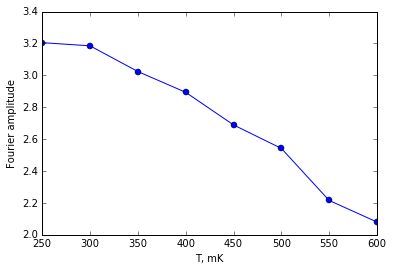

In [28]:
plt.plot(a[0,1:9],a[1,1:9], 'o-')
#plt.plot(a[0],a[1])
plt.xlabel("T, mK")
plt.ylabel("Fourier amplitude")
#plt.xlim(200,800)
#plt.xscale('log')
#plt.yscale('log')
#plt.ylim(0,1.2E-8)
plt.savefig('D:\\p4.pdf', format='pdf')

In [29]:
fitfunc = lambda p, x: p[0]-p[1]*np.power(x,2)*(np.log(p[2]/x))# Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [1, -3/2,1,1] # Initial guess for the parameters

p1, success = optimize.leastsq(errfunc, p0[:], args=(a[0,1:9],a[1,1:9]))
print p1

[  3.41714522e+00  -1.13929675e-06   2.08527007e+01   1.00000000e+00]


[  3.41714522e+00  -1.13929675e-06   2.08527007e+01   1.00000000e+00]


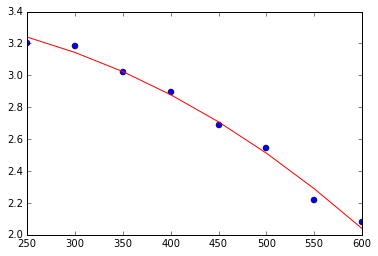

In [30]:
plt.plot(a[0,1:9],a[1,1:9], 'o')
plt.plot(a[0,1:9],fitfunc(p1, a[0,1:9]) ,'r')
#plt.xscale('log')
#plt.yscale('log')
print p1
plt.savefig('D:\\s4.pdf', format='pdf')

In [31]:
np.savetxt('D:\\test.txt', a.transpose(), delimiter=' ')

In [32]:
exp3 = np.fromfile("D:\\r1.txt",dtype=float,count=-1, sep=" ")
exp3 = np.reshape(exp3, (601,5))
exp4 = exp3.transpose()

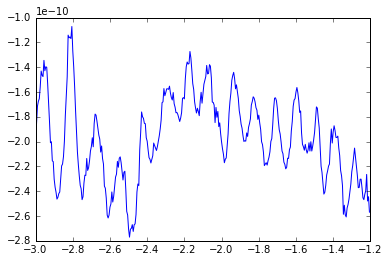

In [33]:
plt.plot(exp4[0,1:360],exp4[1,1:360])

In [34]:
dat2=baseline_als(exp4[1,1:360],100,0.1,10)
exp4[1,1:360]=exp4[1,1:360]-dat2

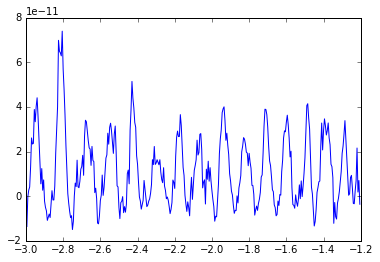

In [35]:
plt.plot(exp4[0,1:360],exp4[1,1:360])

In [36]:
poly = np.polyfit(y,center,4)
x_hat = np.polyval(poly,y)

NameError: name 'center' is not defined

In [ ]:
t = scipy.linspace(-3,-1.2,360)
FFT = abs(scipy.fft(exp4[1,1:360]))
freqs = scipy.fftpack.fftfreq(exp4[1,1:360].size, t[1]-t[0])
exp4[1,1:360]=FFT
exp4[0,1:360]=freqs

In [ ]:
plt.plot(exp4[0,1:360],exp4[1,1:360])
plt.xlim(-30,30)
#plt.ylim(10,40)

In [ ]:
fin[]

In [ ]:
np.savetxt('D:\\fft.txt', exp4.transpose(), delimiter=' ')

In [ ]:
exp4

In [ ]:
l= scipy.linspace(0.01,20,1000)
t = scipy.linspace(0.01,20,1000)
for i in range(0,1000):
    l[i]=88E-9*np.power(t[i]/129.8,-2)*1/(np.log(129.8/t[i])+2)

In [ ]:
l

In [ ]:
plt.plot(t,l)
plt.ylim(0,1E-3)
plt.xlim(0,1)

In [ ]:
for i in range(0,1000):
    l[i]=1.83E-6/t[i]

In [ ]:
plt.plot(t,l)
plt.ylim(0,2E-4)
plt.xlim(0,1)

In [ ]:
a=np.empty([2, 10])
for i in range(1,10):
    a[0,i]=250+50*(i-1)
    
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

fitfunc = lambda p, x: p[1]/(1+p0[2]*np.sin(p[3]+x*1000/p[4])*np.sin(p[3]+x*1000/p[4])) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [1, 1, 2,1,60] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(exp2[0,160:200],exp2[1,160:200]))

#p1[0]=-1E-10
#p1[1]=3E-10
#p1[4]=55
#plt.plot(exp2[0,80:240],fitfunc(p1, exp2[0,80:240]))
#plt.plot(exp2[0,80:240],exp2[1,80:240], 'o')
#print p1
import scipy.optimize as optimize
def residuals(p,x,y):
    if within_bounds(p):
        return y - model(p,x)
    else:
        return 1e6    
fitfunc2 = lambda c, x: c[1]/(1+(2+c[2])*np.power(np.sin(c[3]+x*1000/p1[4]),2)) # Target function
errfunc2 = lambda c, x, y: fitfunc2(c, x) - y # Distance to the target function
c0 = [1.2,1,3,1,1] # Initial guess for the parameters
for i in range(1,10):
    c1, success = optimize.leastsq(errfunc2, c0[:], args=(exp2[0,90:240],exp2[1,90:240]))#
#    plt.plot(exp2[0,90:240],fitfunc2(c1, exp2[0,90:240]) ,'r')
#    plt.plot(exp2[0,90:240],exp2[1,90:240], 'o-')
#    print c1
    a[1,i]=c1[2]
#for i in range(1,10):
#    p1, success = optimize.leastsq(errfunc, p0[:], args=(exp2[0],exp2[i]))
#    p1[1]=
#    p1[3]=
#    p1[4]=60
#    plt.plot(exp2[0],fitfunc(p1, exp2[0]))
#    plt.plot(exp2[0],exp2[i])
#    print p1[2]
#p1[2]=1
#p1[1]=5E-10

#p1[0]=-1.5E-10
#plt.savefig('D:\\s2.pdf', format='pdf')

from lmfit import  Model


x = exp2[0,90:240]
y = exp2[1,90:240]

def buhlo(x, a, b, c,d,f):
    "buhloe"
    return f+a/(1+(b)*np.power(np.sin(c+x*1000/d),2))

fitfunc = lambda p, x: p[1]/(1+p0[2]*np.sin(p[3]+x*1000/p[4])*np.sin(p[3]+x*1000/p[4]))+p[1]/(1+p0[2]*np.sin(p[3]+x*1000/p[4])*np.sin(p[3]+x*1000/2*p[4])) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [1, 1, 2,1,60] # Initial guess for the parameters
gmod = Model(buhlo)
result = gmod.fit(y, x=x, a=5, b=5, c=1, d=60,f=1)

print(result.fit_report())

plt.plot(x, y,         'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()



p1, success = optimize.leastsq(errfunc, p0[:], args=(exp2[0,160:200],exp2[1,160:200]))


In [ ]:
function [ Transf ] = transfer1(R1,R2,l,w0,lambda_vec,m_max)
    #--------------------------------------------------------------------------
    # Plots transfer function of a guassian beam illumination
    #--------------------------------------------------------------------------
    #--------------------------------------------------------------------------
    # Plots Intensity vs. phase/wavelength for a particular wavelength range,
    # taking into account Gaussian beam propagation and integration over final
    # beam size. Model returns the intensity vs. wavelength for particular
    
    #
    #R1-power reflection coefficient of mirror 1
    #R2-power reflection coefficient of mirror 2
    #l-thickness of polymer spacer
    #lambda_vec-wavelength range
    #--------------------------------------------------------------------------
    #Initialising variables.
    #Refractive index
    n = 1.639
    #Amplitude coefficients for mirror 1
r1f =np.sqrt(R1)
r1b = -r1f
t1f = np.sqrt(1 - R1)
t1b = np.sqrt(1 - (r1b ** 2))
Af = 0
#Amplitude coefficients for mirror 2
r2f = np.sqrt(R2)
r2b = -r2f
# FORM RADIUS AND LAMBDA ARRAYS
#m_max = 700;
#Rayleigh range vector
z0_vec = (n * np.pi * w0 ** 2) /eldiv/ lambda_vec
wm_max = max(w0 *elmul* sqrt(1 + ((2. * m_max *elmul* l) /eldiv/ z0_vec) **elpow** 2))
#radius over which we will integrate final reflected intensity
207
rad_vec = (mslice[0:0.0025:1]) *elmul* wm_max
#radius over which we will integrate incident beam intensity
r_vec = (mslice[0:0.0025:1]) *elmul* w0
#radial sampling size
dr = rad_vec(2) - rad_vec(1)
dr1 = r_vec(2) - r_vec(1); print dr1
#arrays with all values of radius and lambda
[rad, _lambda] = meshgrid(rad_vec, lambda_vec)
[r, lambda1] = meshgrid(r_vec, lambda_vec)
#Rayleigh range in cavity spacer and surrounding medium (air)
z0 = (n * pi * w0 ** 2) /eldiv/ _lambda
z01 = (pi * w0 ** 2) /eldiv/ lambda1
# k-values
k0 = 2. * pi /eldiv/ (_lambda)
k = 2. * pi *elmul* n /eldiv/ (lambda1)
# ------------------------
# Analytical solution for collimated beam
#
#Coefficient of Finesse and Airy Function
#F=4*r1f*r2f/((1-r1f*r2f)^2);
#phi_vec=(4.*pi.*n.*l)./lambda;
#Airy=F.*(sin(phi_vec./2).^2)./(1+F.*(sin(phi_vec./2).^2));
# ------------------------
#Reflected field from first mirror
E0 = r1f *elmul* exp(-(rad **elpow** 2) /eldiv/ (w0 **elpow** 2))#.*exp(1i*(k0.*(rad.^2)./4.*z01));
#Incident electric field
E01 = exp(-(r **elpow** 2) /eldiv/ (w0 **elpow** 2))#.*exp(1i*(k0.*(r.^2)./4.*z01));
#intialise Em and m
Em = 0
m = 0
#Loop over the sampling of electric field m times until m_max
while (m < m_max):

    m = m + 1

    #Distance propagated by beam in cavity
    z = 2 * m * l
    #Spot size of beam after round trip in cavity
    #wm=w0.*sqrt(1+(z./z0).^2);
    #Radius of curvature
    #Rz=z.*(1+(z0./z).^2);

    #Amplitude coefficients
    208
    #am=t1f*t1b*(r2b^m)*(r1b^(m-1));






    #mth Electric field
    #E=psi1.*am;

    #Summed electric field
    #Em=Em+E;
    end
    #Total Electric field
    Et = Em + E0
    #Intensity calculation
    Iout = sum(Et *elmul* conj(Et) *elmul* (2 * pi) *elmul* rad *elmul* dr, 2)
    #Incident intensity calculation
    Iin = sum((E01) *elmul* conj(E01) *elmul* (2. * pi *elmul* r) *elmul* dr, 2)
    # Tranfer function implementation.
    Transf = (Iout /eldiv/ Iin)
    Transf = Transf /eldiv/ max(Transf)
    #plot Interferometer Transfer Function
    figure()
    plot(lambda_vec * 1e9, Transf)
    end
